# <font color =#d14d0f>[ES-21AC] State Prisons and County Jails</font>
### Part One

***

### Professor: Victoria Robinson 
### Data Science Fellow: Phillip Pierini

The goal of this project is for students to understand that they can do social work using data. This notebook explores the incarceration trends and impacts of prison realignment in California.

*Estimated Time: 60 minutes*

---

### Table of Contents

[THE DATA](#sectiondata)<br>


[CONTEXT](#sectioncontext)<br>


[PRISONS](#section1)<br>
1. [DATA](#subsection1)<br> 
2. [DATA ANALYSIS](#subsection2)<br>
3. [GENERAL: DESIGNED & STAFFED CAPACITY](#subsection3)<br>
4. [GENDER DIVISION](#subsection4)<br>

## <font color =#d14d0f>Intro to Python and Jupyter Notebook</font> <a id='sectionpy'></a>

In [ ]:
# This loads tools from the datascience library
from datascience import * 

# Loads numerical methods
import numpy as np 

# This will allow us to export your responses as a pdf
from otter import Notebook 


# This loads some visualization tools
import matplotlib  
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight') 
# This selects a certain 'style' for our graphs


# Loads a widgets library that will allow for interactive learning
import ipywidgets as widgets 

## <font color =#d14d0f>The Data</font> <a id='sectiondata'></a>
---

Over the course of two online lectures, we will be working through two notebooks. This first one will inform you about state prisons and the second one will about county jails. 

In this notebook, you will use data from the CDCR (California Department of Corrections and Rehabilitation).

The CDCR reports the number of people in state prisons across California. In this data set, you will find information about the capacity (staff & design) of each prison and the current population. This will provide with a framework with which to understand prison overcrowding and the effectiveness of policy to reduce it. 

If you are interested in learning more please visit:

[CDCR data and infromation](https://github.com/nrjones8/cdcr-population-data)


## <font color =#d14d0f>Context</font>  <a id='sectioncontext'></a>
---

Throughout the course, we have learned about the policies of realignment, incarceration, and crime trends in California. By exploring this dataset we hope to get a clearer picture of the magnitude of prison and county jail overcrowding per facility and region, and the effects of realignment policies in state prisons and county jails.

The key difference between state prisons and jails involve the process of sentencing. Prisons are designed for long term sentences, while jails are for those who are unsentenced or have short term sentences. It is important to note that short-term sentences are generally one year or less. Another difference is that prisons are larger and controlled at the state level. In contrast, jails are smaller and handled by a city or county.

The relationship between the two institutions is emphasized by mass incarceration. Through this activity, we will analyze how overcrowding within California’s state prisons influenced the size of jail populations after realignment policies were implemented.

## <font color =#d14d0f>Prisons</font> <a id='section1'></a>
---

To observe how realignment influenced California's prisons and jails, we obtained data from 1996 to 2018, so that we could understand the trend over time. We will start by observing California's state prisons using the data we found through the CDCR (California Department of Corrections and Rehabilitation).

### **Data** <a id='subsection1'> </a>

#### Data Dictionary
Below you will find a data dictionary for future reference. This data dictionary goes over what the column names mean in the data we loaded previously.

|Column Name   | Description |
|--------------|---------|
|year |Year that the data was collected  |
|month | Month that the data was collected |
|institution_name |  Abbreviated Name of the State Prison|
|population_felons | People imprisoned for committing felony (serious or violent crime) |
|civil_addict | People imprisoned for drug related offenses |
|total_population | Sum of civil addict and population felons columns|
|designed_capacity | Max number of people the prison was built to hold|
|percent_occupied | Percentage of people incarcerated out of designed capacity|
|staffed_capacity | Max number of people the prison can hold based on the number of people employed|

We've already imported the data in a cell above, but let's take a look at it again. This time we'll sort it by year with the oldest years at the top.

In [ ]:
prisons.sort('year').show(5)

### **Data Analysis** <a id='subsection2'> </a>

When processing a new data set, it is a good idea to play around with the data and try to combine it in different ways. To start it's good to think about how many times we expect each prison to occur in our dataset, and how many times they **actually** appear.

Our dataset is made up of prisons in California from the year 1996 to 2018. The counts in our data set were done monthly, meaning for each year we expect there to be at most 12 counts for each prison. Let's calculate the number of times we expect each prison to appear in a cell below.

In [ ]:
months = 12
years = 2018 - 1996 + 1 # We add one to our calculation because we want to include 1996

months * years

By running the cell above you should see that we expect for there to be a maximum of 276 instances of each prison for the time period we have in our data set. This amount is equivalent to an entry once a month for 23 years.

To find the number of times that each institution appears in our data set, we would have to group by the institution name. Essentially, we want our computer to make groups that only have values from the same prison. After we have made these groups, we can decide how to handle the data per group.

The code that corresponds to this is the table function `group()`. The `group()` function takes in a column name and puts all the similar values in that column into groups, then it counts the number of items in each group.

Then, we can use the `sort()` function to order the counts in a specific order.

In [ ]:
# We choose to have the counts in descending order in the following example:
prisons.group("institution_name").sort("count", descending = True).show()

<font color = #d14d0f>**QUESTION 2**:</font> What do we notice from this table? You should notice that there are values in our table that do not correlate with what we calculated above. Remember that we expect each prison to appear at most 276 times.

*Replace this text with your response!*

The cases where we have counts greater than 276 should interest you. If we assume that some of these counts are due to multiple entries per month, why would a prison need to do this? What is the significance of these counts, meaning what makes one count in a month different from the other count in that same month?

To understand why we have different counts, we will look into these special prisons. Thus, the prisons we will observe in the rest of this section are:
- Valley State Prison (VSP)
- Sierra Conservation Center (SCC)
- Los Angeles County State Prison (LAC)

In the following section, we will explain what we think is the cause of "inconsistency" in the data, and how we decided to handle it. Then, we will read a data table with the "cleaned" data using `Table().read_table()` and assign it to a new variable.

Though we denoted them as "inconsistencies", we urge you not to look at this as mistakes in the data but try to think how they fit into the major issues we have learned about in the class.

#### Valley State Prison

From outside research, we discovered that Valley State Prison changed from a female prison to a male prison in 2012 -- October of 2012 to be exact. However, all rows are labeled as a male institution. For future analysis, it would be better to separate VSP into its corresponding female and male years. Thus, we decided to split and relabeled the VSP data into male and female parts. The code for this process is not shown but we have cleaned the data and are reading it as a new table below!

In [ ]:
prisons_1 = Table().read_table("data/prisons1.csv")
prisons_1.where('institution_name', are.containing("VALLEY SP (")).show(5)

### **General: Designed & Staffed Capacity** <a id='subsection3'> </a>

#### Designed Capacity of California's Prisons Over Time

**Context**: The Prison Industrial Complex has created our current issue with mass incarceration. Throughout the course, you have learned how prisons are designed to hold large numbers of people, and how creating these large institutions perpetuates the cycle of mass incarceration because these prisons are made with the intent to be filled.

In this next section, we will break down how the designed capacity of prisons is related to the actual population within a given institution. We will later compare the total population with the number of people employed to sustain this system.

**Data Cleaning**: We will be looking at the trends in prison population over time. For this purpose it is not necessary to view all the columns of our table so we will use another table function, `select()` to cut out the unnecessary columns. We will be keeping `year`, `institution_name`, and `designed_capacity`. In order to use this table in the future, we will assign it to a new variable called `year_and_design_capacity`.

Before we continue, please note that for the remainder of this notebook, we will use an updated version of the `prisons` table that includes the changes we made above. We call this updated table `prisons_updated`.

In [10]:
# Include the changes listed above
prisons_updated = prisons_3

# Select only the necessary columns and show the top 3
year_and_design_capacity = prisons_updated.select("year", "institution_name",'designed_capacity')
year_and_design_capacity.show(3)

year,institution_name,designed_capacity
1996,NCWF (NO CAL WOMEN'S FACIL),400
1996,CCWF (CENTRAL CA WOMEN'S FAC),2004
1996,"CRC (CAL REHAB CTR, WOMEN)",500


Now we want to see what is the `designed_capacity` for ALL the prisons in a given year. Remember that nifty `group()` function? We achieve our goal by grouping by year using the function `group()` and summing over all the prisons in that year. Since we are only interested in looking at designed capacity for all prisons, we can create a new table that only includes the `designed_capacity` and `year` columns. We do this by selecting the necessary columns just as we did above!

In [11]:
design_capacity_ca = year_and_design_capacity.select("designed_capacity", "year").group("year", sum)
design_capacity_ca.show(3)

year,designed_capacity sum
1996,873676
1997,910797
1998,956740


**Plotting**: Although it is possible to compare the values for designed capacity year by year and try to notice a pattern, often times it is more useful to visually inspect the information as it might reveal useful insights and provide a context for the data we are looking at.

Below we drew a line plot to reflect the changes in design capacity of California's state prisons over time.

In order to plot a trend of our data we will use a `plot()` function that takes in two inputs: `plot(x, y)`, where the `x` and `y` represent two column names that you would like to plot along the x and y axis respectively. We then append this to our table's name using dot notation. This tells the computer in which table to look for those columns.

To appropriately label our plot we can use `plt.xlabel('x_axis_name')` and `plt.ylabel('y_axis_name')` to label our axes and `plt.title('plot_title')` for our plot's main title. Notice that we didn't attach any particular table's name via dot notation. These are not table functions but basic plot functionalities from another Python library we loaded at the start of this notebook! In order for them to work, however, they must be run *after* you have created a plot. Take a look below!

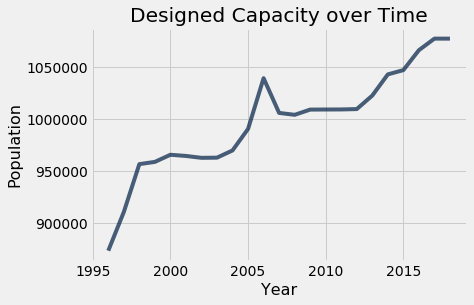

In [12]:
design_capacity_ca.plot("year", "designed_capacity sum")

plt.xlabel("Year")
plt.ylabel("Population")
plt.title("Designed Capacity over Time"); # This semicolon is here for style purposes

We will focus on some years that mark important shifts as a result of realignment.

Let's look at the year 2011. To do this we will employ a new table function to select data only **where** the year is equal to 2011. This function is appropriately named the `where()` function and takes in two inputs: a column name and a year (in that order).

In [13]:
design_capacity_2011 = design_capacity_ca.where("year", 2011)
design_capacity_2011

year,designed_capacity sum
2011,1009197


To emphasize this year and visualize it more easily on our trend line, we will run some code that will create a dot where the year equals 2011. Don't worry about the code used, but feel free to read through it if you're interested in seeing how we created this marker.

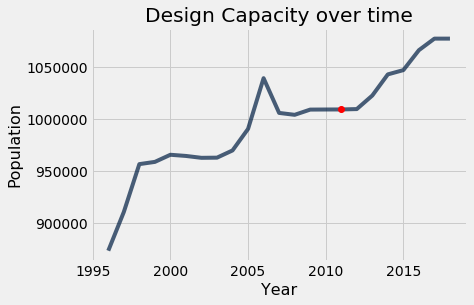

In [14]:
# Assign the year 2011 as the x-coordinate
x_coordinate_2011 = design_capacity_2011.column('year')

# Assign the designed capacity sum in the year 2011 as the y-coordinate
y_coordinate_2011 = design_capacity_2011.column("designed_capacity sum")

design_capacity_ca.plot("year", "designed_capacity sum"); # Plot our trend

plt.xlabel("Year")
plt.ylabel("Population")
plt.title("Design Capacity over time")

plt.plot(x_coordinate_2011, y_coordinate_2011, 'ro'); # Plot a single x,y coordinate

<font color = #d14d0f>**QUESTION 4**:</font> In looking at the graph produced, how does it reflect the systematic changes in California's potential prison population? In particular, name a court case that is related to the red marker in our graph.

*Replace this text with your response!*

<font color = #d14d0f>**QUESTION 5**:</font> Let's analyze our graph further; what do you think happened in 2006 that caused the spike we see?

*Replace this text with your response!*

#### Total Population in California's Prisons Over Time

**Context**: In the last section, we observed the change in the number of people California's prisons are designed to hold. Given this change over time, we wanted to compare it with the actual number of people within California's prisons and see how the two quantities correlated. To do this, we will calculate the percent for how full prisons were based on *how many people each prison is designed to hold*.

**Data Cleaning**: Once again, since we are interested in calculating prison population percentage based on design capacity, we need only a few columns from our `prisons_updated` table. We will select only `year`, `total_population`, and `designed_capacity`. We will call this new table `total_pop_and_design`.

In [15]:
total_pop_and_design = prisons_updated.select("year", "total_population", "designed_capacity")
total_pop_and_design.show(5)

year,total_population,designed_capacity
1996,790,400
1996,2859,2004
1996,794,500
1996,1726,1026
1996,4537,2484


Similar to our last investigation, we will want to group by year and sum both `total_population` and `designed_capacity` for all prisons given a year.

In [16]:
sum_total_and_design = total_pop_and_design.group("year", sum)
sum_total_and_design.show(5)

year,total_population sum,designed_capacity sum
1996,1623806,873676
1997,1739423,910797
1998,1788142,956740
1999,1818019,958881
2000,1820519,965721


Now that we have our information grouped by year and summed over all the prisons, we can begin calculating our percentage. To get this percentage we must first assign all of our `total_population` values to a variable and do the same for `designed_capacity`. Then we will divide the `total_population` values by their corresponding `designed_capacity` and multiply by 100 to get the population percentage.

In [17]:
total_population = sum_total_and_design.column("total_population sum") 
designed_sum = sum_total_and_design.column("designed_capacity sum")

capacity_percentage = (total_population / designed_sum) * 100
capacity_percentage

array([ 185.85905988,  190.97812136,  186.89947112,  189.59797931,
        188.51397039,  186.46297264,  186.17592316,  188.84950734,
        192.63564133,  190.09189001,  188.49532912,  195.52605312,
        190.30095205,  183.36618572,  178.73669545,  173.23535445,
        149.88321645,  144.95077023,  138.83530151,  132.72696534,
        131.7232109 ,  132.02795138,  131.94811151])

Note that our output seems to be a list of numbers, separated by commas. This is because for every row, this percentage was calculated, meaning we should have a list (or in Python, this is called an **array**) that is the same length as the number of rows in our table! The code that follows will add this list of percentages back into our table so that we may plot them. Do not worry about the code below, but feel free to take a look!

In [18]:
# Use .with_column() to add a new column with the percentages calculated above!
total_and_design_and_percentages_table = sum_total_and_design.with_column("Design Percent", capacity_percentage)

total_and_design_and_percentages_table.show(3)

year,total_population sum,designed_capacity sum,Design Percent
1996,1623806,873676,185.859
1997,1739423,910797,190.978
1998,1788142,956740,186.899


<font color = #d14d0f>**QUESTION 6**:</font> What can you immediately comment on by looking at the top three percentage values in our new column?

*Replace this text with your response!*

Now that we have our table set up correctly, we can plot how overcrowding has changed over time.

**Plotting**: Using the same methods as before, we will draw a line plot to reflect the trend in overcrowding in California state prisons over time.

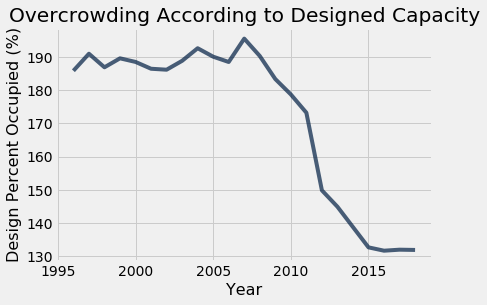

In [19]:
total_and_design_and_percentages_table.plot("year", "Design Percent")

plt.xlabel("Year")
plt.ylabel("Design Percent Occupied (%)")
plt.title("Overcrowding According to Designed Capacity");

<font color = #d14d0f>**QUESTION 7**:</font> What do you notice about this trend over time?

*Replace this text with your response!*